In [30]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

## Load the Data

In [32]:
iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target

In [33]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [35]:
df_iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [40]:
df_iris.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [39]:
df_iris.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
target                3
dtype: int64

In [12]:
def missing_values_proportion(df):
    cols = df.columns
    for col in cols:
        proportion = df[col].isnull().sum()/df.shape[0]
        print(f'proportion of missing value for {col} is {proportion*100:.2f}')

In [36]:
missing_values_proportion(df_iris)
print(f'\nnb of rows {df_iris.shape[0]}')

proportion of missing value for sepal length (cm) is 0.00
proportion of missing value for sepal width (cm) is 0.00
proportion of missing value for petal length (cm) is 0.00
proportion of missing value for petal width (cm) is 0.00
proportion of missing value for target is 0.00

nb of rows 150


## Feature Selection: PCA

In [41]:
X = df_iris.drop('target', axis=1)
y = df_iris['target']

In [42]:
from sklearn.decomposition import PCA

pca = PCA(0.95)

### Standardization

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
X_scaled = StandardScaler().fit_transform(X)

In [46]:
X_pca = pca.fit_transform(X_scaled)

## Random Forest Model

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

RForest = RandomForestClassifier(n_estimators=46,criterion='entropy',random_state=42)

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [174]:
len(X_train), len(X_test), len(y_train), len(y_test)

(120, 30, 120, 30)

In [175]:
RForest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=46, random_state=42)

In [176]:
RForest.score(X_test, y_test)

0.9333333333333333

## Cross Validation

In [177]:
from sklearn.model_selection import cross_val_score, KFold

cross_val = cross_val_score(RForest, X_pca, y, cv=5)

In [178]:
# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(RForest, X_pca, y, cv=kf)

In [179]:
print("Cross-Validation Scores for each fold:")
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: {score:.2f}")

Cross-Validation Scores for each fold:
Fold 1: 0.93
Fold 2: 0.93
Fold 3: 0.90
Fold 4: 0.87
Fold 5: 0.90


In [180]:
avg = np.mean(cv_scores)
print(f"Average Cross-Validation Score: {avg:.2f}")

Average Cross-Validation Score: 0.91


## Confusion Matrix

In [181]:
y_pred = RForest.predict(X_pca)

In [182]:
df_iris['prediction'] = y_pred

In [183]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y, y_pred)

In [184]:
cm_display = ConfusionMatrixDisplay(cm,display_labels=iris.target_names)

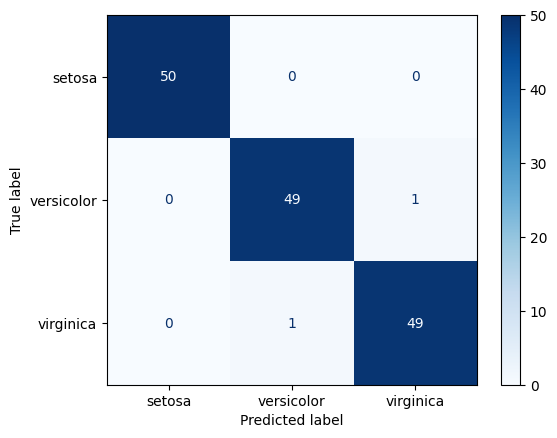

In [185]:
import matplotlib.pyplot as plt

cm_display.plot(cmap=plt.cm.Blues)
plt.show()